# Figure 4 — Functional characterization of evolved AraC-LOV variants derived from POGO-PANCE

Unless explicitly noted otherwise (e.g. indicated as being from Zenodo), all data used for the visualisations was generated using the Illumina or Nanopore pipeline.
Please make sure to download the input dataset `Flow_cytometry_raw_data` from the Zenodo repository and place it in a folder named `data` at root repository level.

For more information, please refer to the `README.md`.


### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A)</strong> Genotypes of individual endpoint variants</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(B)</strong> Heatmap
of RFP reporter activity under light and dark conditions</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(C)</strong> Flow cytometry analysis of light-dependent RFP expression in top-performing variants</div>  


## Notebook Setup

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [1]:
# --- Import necessary modules ---
from importlib import reload
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from pathlib import Path

notebook_dir = Path().resolve()
repo_root = notebook_dir.parent 
sys.path.append(str(repo_root))

# ======================== PLOTTING SETTINGS ========================

# --- Custom color map for mutation visualization ---
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
], N=256)

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})

avenir_fp = FontProperties(family='Avenir Next', weight='demi', size=fs)

# ======================== LAYOUT PARAMETERS ========================

# --- Pre-defined figure dimensions for multi-panel plots ---
hi = 10.5 * 0.75
wi3 = 2.24
wi2 = 4.76
wi1 = 7.24
nr = 5

# --- Utility for shortening sample names ---
short_fn = np.vectorize(lambda x: x[:5])

## Figure 4A: Genotypes of individual endpoint variants
----------------------------
Four phage plaques from the final day
of each evolution pool were isolated, cloned into an expression vector, and sequenced. Mutations
across the LOV2-flanking linker, LOV2 domain, and AraC regions are indicated. Figure created with Adobe Illustrator.

![Alt Text](figure_illustrations/Figure_4A.png)

## Figure 4B: Heatmap of RFP reporter activity under light and dark conditions
----------------------------
 Variants (linked to identities in panel A)
were expressed in E. coli assessed for activity using the RFP reporter assay. Cultures were
incubated in the light or dark for 18 hours, followed by measurement of mRFP fluorescence and
OD600 in a plate reader. Variants were incubated with no Arabinose or IPTG added, and side-by-
side compared to WT, R2-, and R5-LOV2 controls with or without L-Arabinose. Mean
fluorescence values, normalized to OD600, were obtained from the average of three biological
replicates (first two columns); fold change values (dark/light) are shown in the third column. Further modifications done in Adobe Illustrator.

<ipython-input-2-fcdedb5cf49d>:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


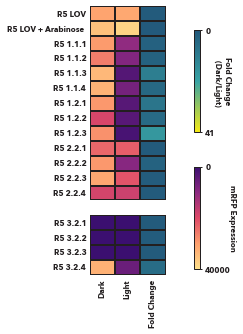

In [ ]:
# --- USER INPUT SECTION: Raw intensity values and labels ---
dark_values = np.array([
    30692.8066666667, 35077.7711111111, 29411.32444, 25971.05111, 33767.85889, 32996.07,
    29109.94, 19086.56889, 28334.78667, 23576.05444,
    29112.49444, 31184.44, 18706.31222, 51.36451,
    49.33814667, 56.29319222, 32696.50667
])
light_values = np.array([
    31372.0655555556, 37866.6344444444, 10514.931, 8809.492778, 3220.429111, 7189.775778,
    3590.999556, 3690.672556, 1634.715811, 22403.87444,
    9412.349333, 21344.27, 17662.65556, 40.13853333,
    38.42679667, 44.11680889, 5824.081344
])
row_labels = [
    "R5 LOV", "R5 LOV + Arabinose ", "R5 1.1.1", "R5 1.1.2", "R5 1.1.3", "R5 1.1.4",
    "R5 1.2.1", "R5 1.2.2", "R5 1.2.3", "R5 2.2.1",
    "R5 2.2.2", "R5 2.2.3", "R5 2.2.4",
    "R5 3.2.1", "R5 3.2.2", "R5 3.2.3", "R5 3.2.4"
]
gap_after_indices = [12] # Insert visual gap after this row index
manual_vmin_expr = 0
manual_vmax_expr = 40000
manual_vmin_fc = 0
manual_vmax_fc = 41

# --- DATA PROCESSING: Compute fold changes and combine data ---
fold_change = dark_values / light_values
expression_data_raw = np.vstack((dark_values, light_values)).T
fold_change_2d = fold_change.reshape(-1, 1)
data_combined = np.concatenate((expression_data_raw, fold_change_2d), axis=1)

# --- Insert visual gaps into data and labels for subgroup separation ---
def insert_gaps(data, labels, gap_indices):
    data_with_gaps = []
    labels_with_gaps = []
    shift = 0
    gap_indices = sorted(gap_indices)
    for i, (row, label) in enumerate(zip(data, labels)):
        data_with_gaps.append(row)
        labels_with_gaps.append(label)
        while gap_indices and i == gap_indices[0]:
            data_with_gaps.append(np.array([np.nan, np.nan, np.nan]))
            labels_with_gaps.append("")
            gap_indices.pop(0)
    return np.array(data_with_gaps), labels_with_gaps

# --- Insert gaps ---
data_combined_with_gaps, row_labels_with_gaps = insert_gaps(data_combined, row_labels, gap_after_indices)
special_mask = np.isnan(data_combined_with_gaps)

# --- DEFINE CUSTOM COLORMAPS ---
expression_cmap = LinearSegmentedColormap.from_list("expression_cmap", ["#3B0F70", "#8C2981", "#DE4968", "#FE9F6D", "#FEE08B"], N=256)
foldchange_cmap = LinearSegmentedColormap.from_list("foldchange_cmap", ["#22577A", "#38A3A5", "#F6EB16"], N=256)

# --- PLOTTING SETTINGS ---
vmin_expr = manual_vmin_expr if manual_vmin_expr is not None else 0
vmax_expr = manual_vmax_expr if manual_vmax_expr is not None else np.max(expression_data_raw)
vmin_fc = manual_vmin_fc if manual_vmin_fc is not None else 0
vmax_fc = manual_vmax_fc if manual_vmax_fc is not None else np.max(fold_change)


fig, ax = plt.subplots(figsize=(2.5, 4.75))

# --- Plot expression heatmap (first 2 columns) ---
mask_fc = np.zeros_like(data_combined_with_gaps, dtype=bool)
mask_fc[:, 2] = True
mask_fc |= special_mask
sns.heatmap(
    data_combined_with_gaps,
    mask=mask_fc,
    cmap=expression_cmap,
    vmin=vmin_expr,
    vmax=vmax_expr,
    annot=False,
    fmt=".2f",
    linewidths=0.1,
    linecolor='#231F20',
    xticklabels=["Dark", "Light", "Fold Change"],
    yticklabels=row_labels_with_gaps,
    cbar=False,
    ax=ax
)

# --- Plot fold change heatmap (last column) ---
mask_expr = np.zeros_like(data_combined_with_gaps, dtype=bool)
mask_expr[:, 0] = True
mask_expr[:, 1] = True
mask_expr |= special_mask
sns.heatmap(
    data_combined_with_gaps,
    mask=mask_expr,
    cmap=foldchange_cmap,
    vmin=vmin_fc,
    vmax=vmax_fc,
    annot=False,
    fmt=".2f",
    linewidths=0.1,
    linecolor='#231F20',
    xticklabels=["Dark", "Light", "Fold Change"],
    yticklabels=row_labels_with_gaps,
    cbar=False,
    ax=ax
)

# --- Overlay white boxes to visually separate gaps ---
for idx, label in enumerate(row_labels_with_gaps):
    if label == "":
        ax.add_patch(plt.Rectangle((0, idx), 3, 1, fill=True, color='white', lw=0))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=fs, rotation=0, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fs, rotation=0)
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both', length=0)
ax.set_title("")

norm_expr = plt.Normalize(vmin=manual_vmin_expr, vmax=manual_vmax_expr)
cbar_ax_expr = fig.add_axes([1.1, 0.2, 0.03, 0.30]) 
cbar_expr = fig.colorbar(
    plt.cm.ScalarMappable(cmap=expression_cmap.reversed(), norm=norm_expr),
    cax=cbar_ax_expr,
    orientation='vertical'
)
cbar_expr.set_label('mRFP Expression', rotation=270, labelpad=5, fontproperties=avenir_fp)
cbar_expr.ax.yaxis.set_label_position('right') 
cbar_expr.set_ticks([vmin_expr, round(vmax_expr, 1)])
cbar_expr.ax.tick_params(labelsize=fs, length=2)
cbar_expr.set_ticks([manual_vmax_expr, manual_vmin_expr])
cbar_expr.set_ticklabels(['0', '40000']) 

cbar_ax_fc = fig.add_axes([1.1, 0.6, 0.03, 0.30]) 
cbar_fc = fig.colorbar(
    plt.cm.ScalarMappable(cmap=foldchange_cmap.reversed(), norm=plt.Normalize(vmin=vmax_fc, vmax=vmin_fc)),
    cax=cbar_ax_fc,
    orientation='vertical'
)
cbar_fc.set_label('Fold Change \n (Dark/Light)', fontsize=fs, rotation = 270, labelpad = 15, fontproperties=avenir_fp)
cbar_fc.ax.yaxis.set_label_position('right') 
cbar_fc.set_ticks([vmin_fc, round(vmax_fc, 1)])
cbar_fc.ax.tick_params(labelsize=fs, length=2)
cbar_fc.set_ticks([manual_vmax_fc, manual_vmin_fc])
cbar_fc.set_ticklabels(['0', '41']) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=fs, rotation=90)
ax.xaxis.tick_bottom()

plt.tight_layout()
plt.show()


## Figure 4C: Flow cytometry analysis of light-dependent RFP expression in top-performing variants

----------------------------
Cultures were prepared as described in (B), without arabinose or IPTG, for the R2-LOV, R2-LOV P1.1.3,
and R2-LOV P2.1.3 variants to assess switching behavior based on mRFP reporter fluorescence.
Median mRFP fold changes between dark and light conditions are shown.

**Note:** The following analysis uses the `cytoflow` package, which is incompatible with modern versions of `seaborn`, `matplotlib`, and `numpy`.  
To avoid conflicts, run the Cytoflow section in a **separate virtual environment**. Please activate this environment **after** you have executed the code blocks above.

You can create and activate the required environment as follows:

```bash
# Add the Cytoflow conda channel
conda config --add channels bpteague

# Create and activate the environment
conda create --name cf cytoflow notebook
conda activate cf

#### Setup

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [3]:
# --- Import necessary modules ---
import cytoflow
from cytoflow import *
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import math

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})


In [4]:
# --- Import FACS Data ---
op_0 = ImportOp(
    conditions={'CF_File': 'category'}, # Define metadata column
    tubes=[
        # Each Tube corresponds to one .fcs file (one sample)
        # `conditions` adds a label to each tube for grouping
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/04_sd2_AraC_S170_R2_LOV_1_blue_light.fcs',
            conditions={'CF_File': '04_sd2_AraC_S170_R2_LOV_1_blue_light'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light.fcs',
            conditions={'CF_File':
                        '05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light.fcs',
            conditions={'CF_File':
                        '06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/16_sd2_AraC_S170_R2_LOV_1_dark.fcs',
            conditions={'CF_File': '16_sd2_AraC_S170_R2_LOV_1_dark'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/17_AraC_S170_LOV_SwR1_R2_1_C3_dark.fcs',
            conditions={'CF_File': '17_AraC_S170_LOV_SwR1_R2_1_C3_dark'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/18_AraC_S170_LOV_SwR2_R2_1_C3_dark.fcs',
            conditions={'CF_File': '18_AraC_S170_LOV_SwR2_R2_1_C3_dark'})
    ],
    # Rename FACS channels to readable names
    channels={
        'FSC-A': 'FSC_A',
        'FSC-H': 'FSC_H',
        'SSC-A': 'SSC_A',
        'SSC-H': 'SSC_H',
        'Y610-A': 'Y610_A', # Fluorescence channel
    })

# Apply the import operation and load data into an experiment object
ex_0 = op_0.apply()

# --- Gate for E. coli population ---
op_1 = PolygonOp(name='Ecoli',
                 xchannel='SSC_A',
                 ychannel='FSC_A',
                 vertices=[(1357.9732606179289, 275.05545196062917),
                           (3096.358586276033, 130.4833062471451),
                           (30016.169863090054, 22463.177752089905),
                           (21981.80211486695, 58220.89159406637),
                           (742.6137843756184, 6004.526015249525),
                           (818.5434737539503, 698.6374935564252)],
                 xscale='log',
                 yscale='log')

# Apply E. coli gating to data
ex_1 = op_1.apply(ex_0)

# --- Gate for singlet cells ---
op_2 = PolygonOp(name='Singlets',
                 xchannel='SSC_A',
                 ychannel='SSC_H',
                 vertices=[(720.9528536391655, 715.2244917579866),
                           (2415.7462968326668, 1718.2013652044473),
                           (81537.30363552464, 51916.855303397606),
                           (54488.91914190919, 63080.21963700783),
                           (575.8161707505337, 949.4559941564318)],
                 xscale='log',
                 yscale='log')

# Apply singlet gating
ex_2 = op_2.apply(ex_1)

# --- Filter gated population ---
# Keep only events that passed both 'Ecoli' and 'Singlets' gates
ex_2.data = ex_2.data[ex_2.data['Ecoli']==True]
ex_2.data = ex_2.data[ex_2.data['Singlets']==True]
# --- Downsample ---
# Take a random sample of 15,000 events per CF_File to normalize cell counts
ex_2.data = ex_2.data.groupby('CF_File').apply(lambda x: x.sample(15000)).reset_index(drop=True)
# --- Compute statistics ---
# Calculate the median fluorescence (Y610_A) per sample
stats = ex_2.data.groupby(['CF_File']).median().reset_index()

colors = ['#93959866', '#0075BF66']

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/cytoflow/utility/log_scale.py:117: RuntimeWarning: invalid value encountered in log10


In [1]:
def FACS_hist(title, input_samples, label_names, colors, stats):
    # --- Plot aesthetics ---
    sns.set(style="white")
    sns.set(font_scale=1.5)
    sns.set_style('ticks')
    plt.rcParams["figure.figsize"] = (5, 5)
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.major.width"] = 3
    plt.rcParams["xtick.minor.width"] = 3
    plt.rcParams["ytick.major.width"] = 3   
    plt.xlabel('log[RFP]')

    # --- Subset data ---
    subset = ex_2.data[ex_2.data['CF_File'].isin(input_samples)].copy()
    subset['Y610_A'].replace(0, 0.001, inplace=True)
    subset['Y610_A'] = pd.to_numeric(subset['Y610_A'], errors='coerce')
    plt.gca().set_xlim((1, max(subset['Y610_A'])))

    # --- Custom legend ---
    handles = [Patch(facecolor=color, label=label) for label, color in zip(label_names, colors)]

    # --- Filled KDE curves (with color) ---
    sns.kdeplot(
        data=subset,
        x='Y610_A',
        hue=subset['CF_File'].cat.remove_unused_categories(),
        cut=0,
        fill=True,
        common_norm=False,
        alpha=0.4,
        log_scale=True,
        palette=colors,
        linewidth=0
    )

    # --- Overlay black KDE outlines manually for each sample ---
    for input_sample in input_samples:
        subset_single = subset[subset['CF_File'] == input_sample]
        sns.kdeplot(
            data=subset_single,
            x='Y610_A',
            cut=0,
            fill=False,
            common_norm=False,
            log_scale=True,
            color='black',
            linewidth=3
        )

    sns.despine()

    # --- Legend ---
    plt.legend(handles=handles, labels=label_names, frameon=False, loc='center', bbox_to_anchor=(1.3, 0.5))

    # --- Median lines ---
    for input_sample in input_samples:
        median = stats[stats['CF_File'] == input_sample]['Y610_A'].iloc[0]
        print(stats[stats['CF_File'] == input_sample]['Y610_A'])
        plt.axvline(x=median, color='black', linewidth=2)

    # --- Limits ---
    plt.ylim(0, 2.5)
    plt.xlim(1, 10_000_000)

    plt.show()

In [ ]:
# --- Plot for R2-LOV ---
FACS_hist('ctrl', ['16_sd2_AraC_S170_R2_LOV_1_dark', '04_sd2_AraC_S170_R2_LOV_1_blue_light'], ['AraC S170 R2 LOV light', 'AraC S170 R2 LOV dark'], ['#0075BF66', '#93959866'], stats)

In [ ]:
# --- Plot for P1.1.3 ---
FACS_hist('SwR1', ['17_AraC_S170_LOV_SwR1_R2_1_C3_dark', '05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light'], ['AraC S170 R2 P1.1.3 LOV light', 'AraC S170 R2 P1.1.3 LOV dark'], ['#0075BF66', '#93959866'], stats)

In [ ]:
# --- Plot for P2.1.3 ---
FACS_hist('SwR2', ['18_AraC_S170_LOV_SwR2_R2_1_C3_dark', '06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light'], ['AraC S170 R2 P2.1.3 LOV dark', 'AraC S170 R2 P2.1.3 LOV light'], colors, stats)